In [1]:
#Importar o dataset
import pandas as pd
df=pd.read_csv("Toddler_Autism_dataset_July_2018.csv")


In [2]:
#Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [4]:
# Primeiros registros
df.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# Formato do dataset
df.shape

(1054, 19)

In [6]:
# Estatísticas gerais do dataset
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [8]:
# Colunas do dataset
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [9]:
# Remover colunas insignificantes
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [10]:
# Calcular o percentual de crianças que possuem sintomas de autismo
yes_autism= df[df['Class/ASD Traits ']=='Yes']
no_autism= df[df['Class/ASD Traits ']=='No']

print("Crianças com autismo:",round(len(yes_autism)/len(df) * 100,2))

print("Crianças sem autismo:",round(len(no_autism)/len(df) * 100,2))

Crianças com autismo: 69.07
Crianças sem autismo: 30.93


In [11]:
# Exibindo o conteúdo da coluna alvo
df['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

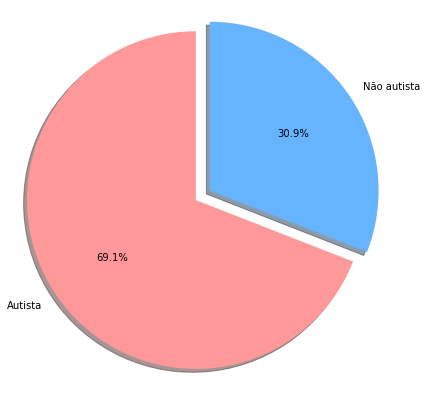

In [19]:
# Gráfico de pizza para a distribuição de valores na coluna alvo.
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ['#ff9999','#66b3ff']
plt.pie(df["Class/ASD Traits "].value_counts(),labels=('Autista','Não autista'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1, colors = colors)
plt.axis('equal')

plt.show()

In [83]:
# Verificando dados nulos
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

<AxesSubplot:>

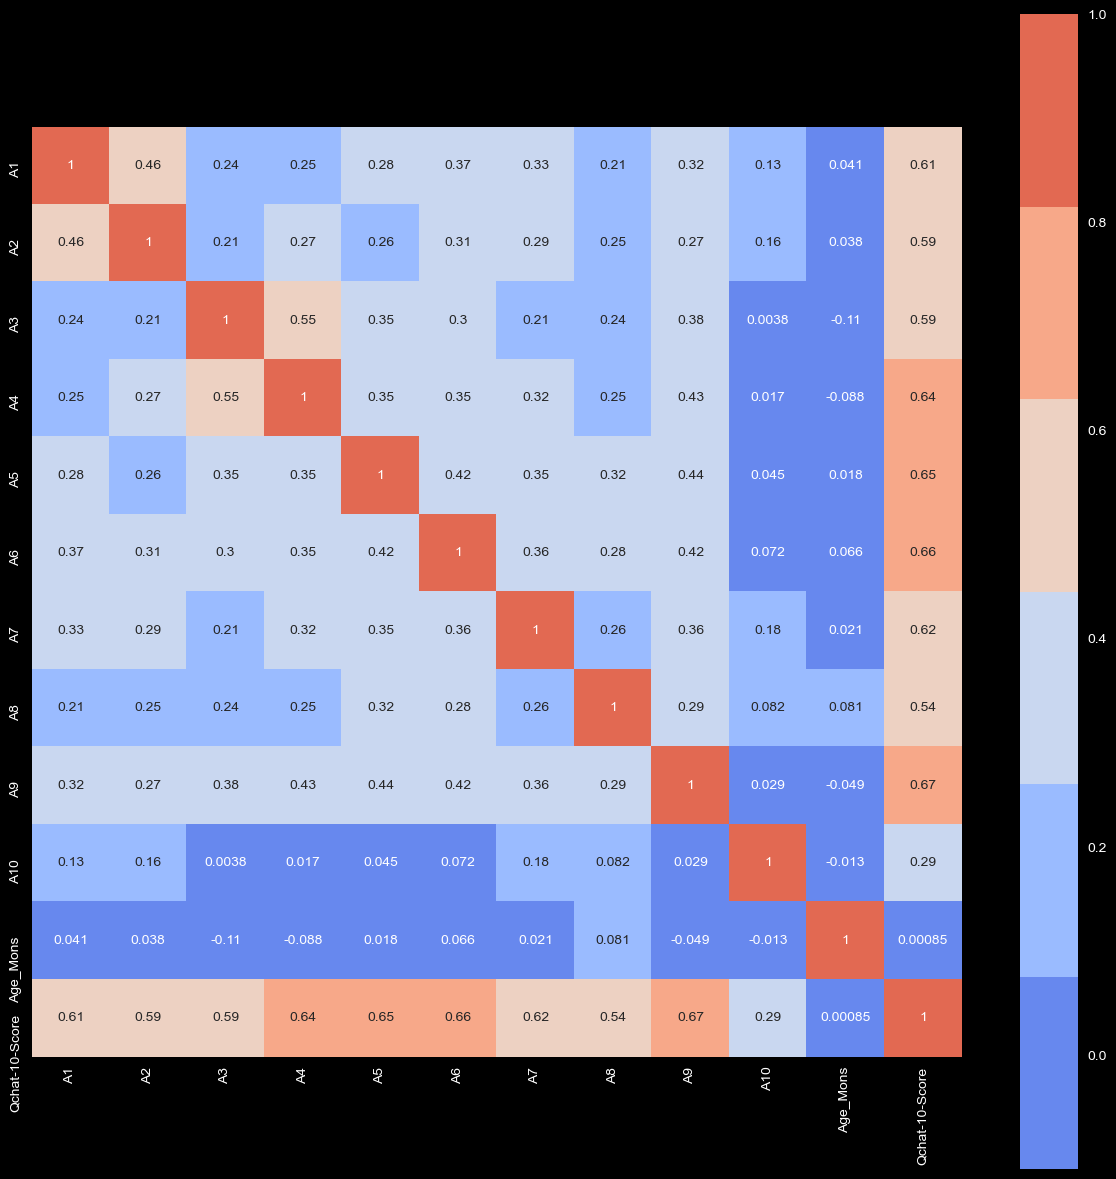

In [82]:
# Correlação por meio da plotagem do mapa de calor do método Pearson
import seaborn as sns
corr = df.corr( )
plt.figure(figsize = (15,15))
colormap = sns.color_palette("coolwarm")
sns.heatmap(data = corr, annot = True, square = True, cbar = True, cmap=colormap)

array([[<AxesSubplot:title={'center':'A1'}>,
        <AxesSubplot:title={'center':'A2'}>,
        <AxesSubplot:title={'center':'A3'}>],
       [<AxesSubplot:title={'center':'A4'}>,
        <AxesSubplot:title={'center':'A5'}>,
        <AxesSubplot:title={'center':'A6'}>],
       [<AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>],
       [<AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'Age_Mons'}>,
        <AxesSubplot:title={'center':'Qchat-10-Score'}>]], dtype=object)

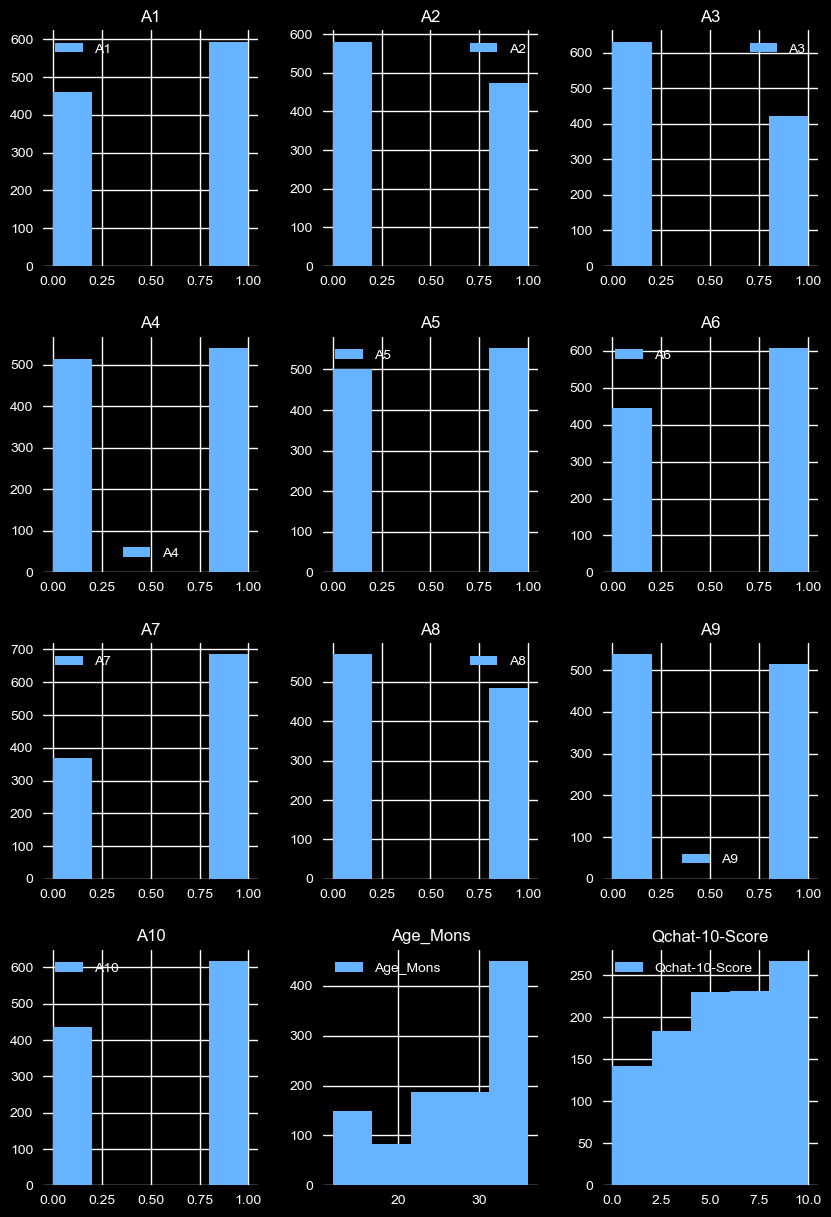

In [84]:
df.hist(grid=True,
        figsize=(10, 15),
        legend=True,
        bins=5,
        orientation='vertical',
        color='#66b3ff')

In [91]:
# Pré-processamento :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Qchat-10-Score         int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [93]:
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,4,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,9,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,8,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,5,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,6,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,2,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,8,1,10,0,0,1
